# Libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

# Data

In [6]:
returns = (
  pd.read_csv(
    '../data/Portfolios_Formed_on_ME_monthly_EW.csv',
    na_values = -99.99,
    index_col = 0,
    parse_dates = True,
    date_parser = lambda x: 
      pd.to_datetime(x, format = '%Y%m').to_period('M')
  )
  [['Lo 10', 'Hi 10']]
  .apply(lambda col: col / 100)
)
returns.columns = ['small_cap', 'large_cap']
returns.head()

,small_cap,large_cap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


# Computation

1. Compute wealth index
2. Compute previous peaks
3. Compute drawdown — wealth value as a percentage of the previous peak

In [9]:
# Calculate the value of a portfolio as it grows over time
portfolio_value = 1000
wealth_index = portfolio_value * (1 + returns['large_cap']).cumprod()
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: large_cap, dtype: float64

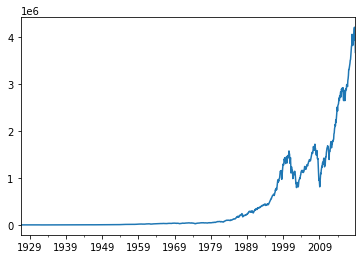

In [10]:
wealth_index.plot.line();

In [11]:
previous_peaks = wealth_index.cummax()
previous_peaks.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1078.293786
1926-11    1080.497711
Freq: M, Name: large_cap, dtype: float64

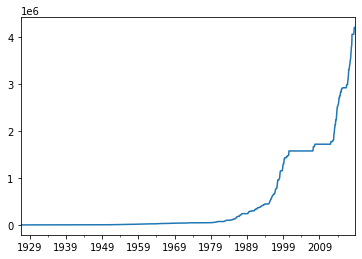

In [12]:
previous_peaks.plot();

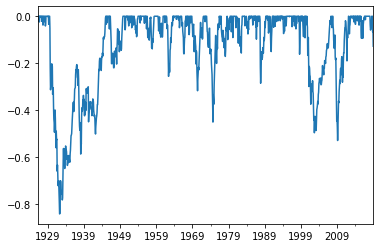

In [14]:
drawdown = (wealth_index - previous_peaks) / previous_peaks
drawdown.plot();

In [16]:
drawdown.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: large_cap, dtype: float64

Max drawdown since 2015

In [19]:
print(drawdown['2015':].min(), drawdown['2015':].idxmin())

-0.1273186733099998 2018-12
